## KB 시세

In [11]:
import pandas as pd

import xlwings as xw

path = r'{}'
wb = xw.Book(path) 

sheet = wb.sheets['{}']   
row_num = sheet.range(1,1).end('down').end('down').row  
data_range = 'A3:B' + str(row_num)
#apt_info_column = ["단지명", "주소(지번)", "주소(도로명)", "공급/전용면적", "세대수", "방/욕실수", "현관구조"]
apt_info = sheet[data_range].options(pd.DataFrame, index=False, header=False).value 

### 단지 정보

In [12]:
import re
apt_info_column = apt_info[0]
apt_info_row = apt_info[1]
apt_info_column = apt_info_column.tolist()


def makeAptInfo(apt_info_row, apt_info_column):
    apt_info_row = apt_info_row.tolist()    
    apt = pd.DataFrame([apt_info_row], columns=apt_info_column)
    areas = apt["공급/전용면적"][0].split('/')
    apt["공급"] = float(areas[0])
    apt["전용"] = float(areas[1].replace("㎡", ""))
    households = apt["세대수"][0].split(' ')
    
    household = int(re.findall('\d+', households[0])[0])
    totalHousehold = int(re.findall('\d+', households[1])[0])
    tRooms = apt["방/욕실수"][0].split('/')
    rooms = int(re.findall('\d+', tRooms[0])[0])
    bathroom = int(re.findall('\d+', tRooms[1])[0])
    apt["방수"] = rooms
    apt["욕실수"] = bathroom
    apt = apt.drop(["세대수", "공급/전용면적", "방/욕실수"], axis=1)
    apt["세대수"] = household
    apt["총세대수"] = totalHousehold
    return apt

In [13]:
apt = makeAptInfo(apt_info_row, apt_info_column)

### 시세 갱신일

In [14]:

def makeRefreshingDate(sheet, df):    
    price_refreshing_row_num = sheet.range(11,1).row
    price_refreshing_data_range = 'A11:A' + str(price_refreshing_row_num)
    price_refreshing_info = sheet[price_refreshing_data_range].options(pd.DataFrame, index=False, header=False).value
    price_refreshing_info = price_refreshing_info[0][0].split(' ')
    
    from datetime import datetime
    print(price_refreshing_info[3])
    price_refreshing_info = datetime.strptime(price_refreshing_info[3], '%Y.%m.%d')
    
    df.insert(loc=0, column="시세갱신일", value=price_refreshing_info)
    df.reset_index(drop=True)
    df.index += 1

    return df

In [15]:
makeRefreshingDate(sheet, apt)

2019.12.06


,시세갱신일,단지명,주소(지번),주소(도로명),현관구조,공급,전용,방수,욕실수,세대수,총세대수
1,2019-12-06,경동윈츠리버,서울특별시 동작구 본동 484,서울특별시 동작구 노량진로32길,계단식,78.93,56.68,2,1,142,272


### 시세정보

In [16]:
def reorganizeColumns(df, strList, baseIndex):
    bignames = makeColumns(strList)
    big_col = list(df.columns)
    small_col = list(df.iloc[baseIndex])
    
    setColumns(big_col, small_col, bignames)    
    df.columns = [big_col, small_col]

In [17]:
def setColumns(big_col, small_col, bignames):
    for num, col in enumerate(small_col):
        #print(num, col)
        if col == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bignames:                
                big_col[num] = big_col[check]
                #print('big_col[', check, ']:', big_col[check], 'big_col[', num,']:', big_col[num])
                break
            else:
                #print('ELSE::',check)
                check = check - 1

In [18]:
def makeColumns(list):
    colList = list.split(' ')
    return colList

In [19]:
price_row_num = sheet.range(14,1).end('down').row  
price_data_range = 'A12:I' + str(price_row_num)
apt_price_info = sheet[price_data_range].options(pd.DataFrame, index=False, header=True).value 
apt_price_info

,기준월,매매가,NaN,NaN,전세가,NaN,NaN,월세가,NaN
0,None,하위평균가,일반평균가,상위평균가,하위평균가,일반평균가,상위평균가,보증금,월세
1,2019.12,59500,62500,63750,34000,35500,36500,5000,80~90
2,2019.11,59500,62500,63750,34000,35500,36500,5000,80~90
3,2019.10,58000,62500,63750,33500,34500,35500,5000,80~90
4,2019.09,58000,61500,63500,33500,34500,35500,5000,80~90
...,...,...,...,...,...,...,...,...,...
194,2003.11,19500,24250,24750,-,-,-,-,-
195,2003.10,19500,24250,24750,-,-,-,-,-
196,2003.09,19250,23750,24500,-,-,-,-,-
197,2003.08,18000,23000,24500,-,-,-,-,-


In [20]:
reorganizeColumns(apt_price_info, '기준월 매매가 전세가 월세가', 0)

In [21]:
apt_price_info

기준월    매매가                  전세가                 월세가       
         기준월  하위평균가  일반평균가  상위평균가  하위평균가  일반평균가  상위평균가   보증금     월세
0       None  하위평균가  일반평균가  상위평균가  하위평균가  일반평균가  상위평균가   보증금     월세
1    2019.12  59500  62500  63750  34000  35500  36500  5000  80~90
2    2019.11  59500  62500  63750  34000  35500  36500  5000  80~90
3    2019.10  58000  62500  63750  33500  34500  35500  5000  80~90
4    2019.09  58000  61500  63500  33500  34500  35500  5000  80~90
..       ...    ...    ...    ...    ...    ...    ...   ...    ...
194  2003.11  19500  24250  24750      -      -      -     -      -
195  2003.10  19500  24250  24750      -      -      -     -      -
196  2003.09  19250  23750  24500      -      -      -     -      -
197  2003.08  18000  23000  24500      -      -      -     -      -
198  2003.07  18000  22500  24000      -      -      -     -      -

[199 rows x 9 columns]

In [22]:
apt_price_info.columns

MultiIndex([('기준월',   '기준월'),
            ('매매가', '하위평균가'),
            ('매매가', '일반평균가'),
            ('매매가', '상위평균가'),
            ('전세가', '하위평균가'),
            ('전세가', '일반평균가'),
            ('전세가', '상위평균가'),
            ('월세가',   '보증금'),
            ('월세가',    '월세')],
           )

In [23]:
new_price_col_data = apt_price_info.drop([0, 0])

In [24]:
new_price_col_data = new_price_col_data.sort_values(by=new_price_col_data.columns[0], ascending=True)

In [25]:
new_price_col_data = new_price_col_data.reset_index(drop=True)
new_price_col_data.index += 1

In [26]:
from datetime import datetime

new_price_col_data['기준월'] = pd.to_datetime(new_price_col_data['기준월']['기준월'], errors='coerce')
new_price_col_data

기준월    매매가                  전세가                 월세가       
           기준월  하위평균가  일반평균가  상위평균가  하위평균가  일반평균가  상위평균가   보증금     월세
1   2003-07-01  18000  22500  24000      -      -      -     -      -
2   2003-08-01  18000  23000  24500      -      -      -     -      -
3   2003-09-01  19250  23750  24500      -      -      -     -      -
4   2003-10-01  19500  24250  24750      -      -      -     -      -
5   2003-11-01  19500  24250  24750      -      -      -     -      -
..         ...    ...    ...    ...    ...    ...    ...   ...    ...
194 2019-08-01  58000  61500  63500  33500  34500  35500  5000  80~90
195 2019-09-01  58000  61500  63500  33500  34500  35500  5000  80~90
196 2019-10-01  58000  62500  63750  33500  34500  35500  5000  80~90
197 2019-11-01  59500  62500  63750  34000  35500  36500  5000  80~90
198 2019-12-01  59500  62500  63750  34000  35500  36500  5000  80~90

[198 rows x 9 columns]

In [27]:
# new_price_col_data['전세가', '하위평균가'] = new_price_col_data['전세가', '하위평균가'].replace('-', int(0))
# new_price_col_data['전세가', '일반평균가'] = new_price_col_data['전세가', '일반평균가'].replace('-', int(0))
# new_price_col_data['전세가', '일반평균가'] = new_price_col_data['전세가', '일반평균가'].replace('-', int(0))
new_price_col_data['전세가'] = new_price_col_data['전세가'].replace('-', 0)
new_price_col_data

기준월    매매가                    전세가                     월세가       
           기준월  하위평균가  일반평균가  상위평균가    하위평균가    일반평균가    상위평균가   보증금     월세
1   2003-07-01  18000  22500  24000      0.0      0.0      0.0     -      -
2   2003-08-01  18000  23000  24500      0.0      0.0      0.0     -      -
3   2003-09-01  19250  23750  24500      0.0      0.0      0.0     -      -
4   2003-10-01  19500  24250  24750      0.0      0.0      0.0     -      -
5   2003-11-01  19500  24250  24750      0.0      0.0      0.0     -      -
..         ...    ...    ...    ...      ...      ...      ...   ...    ...
194 2019-08-01  58000  61500  63500  33500.0  34500.0  35500.0  5000  80~90
195 2019-09-01  58000  61500  63500  33500.0  34500.0  35500.0  5000  80~90
196 2019-10-01  58000  62500  63750  33500.0  34500.0  35500.0  5000  80~90
197 2019-11-01  59500  62500  63750  34000.0  35500.0  36500.0  5000  80~90
198 2019-12-01  59500  62500  63750  34000.0  35500.0  36500.0  5000  80~90

[198 rows x 9 columns]

### 전세가/매매가 차트

In [28]:
import matplotlib.pyplot as plt
import numpy as np
 

In [29]:
from matplotlib import font_manager, rc
import matplotlib.pylab as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

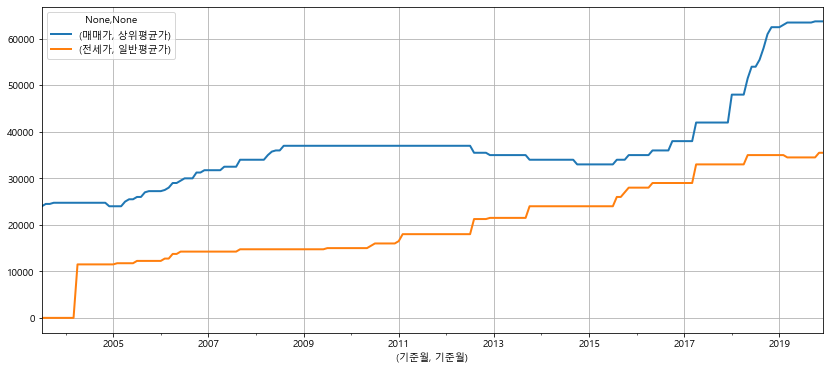

In [30]:
ax = plt.gca()
new_price_col_data.plot(kind='line', x=new_price_col_data.columns[0], y=new_price_col_data.columns[3], ax=ax)
new_price_col_data.plot(kind='line', x=new_price_col_data.columns[0], y=new_price_col_data.columns[5], ax=ax)
plt.show()

### 가치 차트

In [32]:
import xlwings as xw
import pandas as pd

path = r'{}'
wb_value = xw.Book(path) 
print(path)
value_sheet = wb_value.sheets['sheet1']   
row_num = value_sheet.range(1,1).end('down').end('down').row  
data_range = 'A1:F' + str(row_num)
# #apt_info_column = ["단지명", "주소(지번)", "주소(도로명)", "공급/전용면적", "세대수", "방/욕실수", "현관구조"]
value_info = value_sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
value_info = value_info.drop([0, 0])

데이터\가치차트_1116.xlsx


In [33]:
value_info["년도"] = pd.to_datetime(value_info["년도"], format='%Y', errors='ignore')

In [34]:

value_info["년도"] = pd.DatetimeIndex(value_info["년도"]).year
value_info["도시근로자 평균월소득(A)"] = value_info["도시근로자 평균월소득(A)"].map('{:,.0f}'.format)
value_info["평균연소득 (A X 12개월)"] = value_info["평균연소득 (A X 12개월)"].map('{:,.0f}'.format)
value_info["KB시세 및 매수가능가격"] = 0
#value_info["매매가격"] = value_info["매매가격"].map('{:,.0f}'.format)
value_info["매매가격"] = 0
#value_info["가치"] = value_info["가치"].map('{:,.2f}'.format)
value_info["가치"] = 0


In [35]:
t_value_price = new_price_col_data[new_price_col_data["기준월"]["기준월"].dt.month == 10]
t_value_price = t_value_price.reset_index(drop=True)
t_value_price['기준월'] = t_value_price['기준월']['기준월'].dt.year
t_value_price = t_value_price.reset_index(drop=True)
t_value_price.index += 1
value_price_list = t_value_price["기준월"]["기준월"].tolist()

In [36]:
for idx, year in enumerate(value_price_list):   
    
    tValue = t_value_price.loc[t_value_price['기준월']['기준월'] == year, '매매가']['상위평균가'].values[0]
    value_info.loc[value_info['년도'] == year, 'KB시세 및 매수가능가격'] = tValue
            

        
value_info["도시근로자 평균월소득(A)"] = value_info["도시근로자 평균월소득(A)"].str.replace(",", "")
value_info["평균연소득 (A X 12개월)"] = value_info["평균연소득 (A X 12개월)"].str.replace(",", "")

value_info["도시근로자 평균월소득(A)"] = pd.to_numeric(value_info["도시근로자 평균월소득(A)"])
value_info["평균연소득 (A X 12개월)"] = pd.to_numeric(value_info["평균연소득 (A X 12개월)"])
#value_info["년도"] = pd.to_datetime(value_info["년도"].astype(str), format='%Y')
dropIndexs = value_info[value_info['KB시세 및 매수가능가격'] == 0].index
value_info.drop(dropIndexs, inplace=True)
value_info.reset_index(drop=True)

value_info.index = np.arange(1, len(value_info) + 1)

value_info["매매가격"] = value_info["KB시세 및 매수가능가격"] * 10000

value_info["가치"] = value_info["매매가격"] / value_info["평균연소득 (A X 12개월)"]
value_info["평균가치"] = value_info["가치"].sum() / value_info["가치"].count()
#value_info["평균가치"] = value_

#value_info = value_info.set_index('년도')
value_info

,년도,도시근로자 평균월소득(A),평균연소득 (A X 12개월),KB시세 및 매수가능가격,매매가격,가치,평균가치
1,2003,2930755,35169060,24750.0,247500000.0,7.037436,7.337819
2,2004,3112474,37349688,24750.0,247500000.0,6.626561,7.337819
3,2005,3252090,39025080,27250.0,272500000.0,6.982689,7.337819
4,2006,3444054,41328648,31250.0,312500000.0,7.561341,7.337819
5,2007,3656201,43874412,34000.0,340000000.0,7.749392,7.337819
6,2008,3900622,46807464,37000.0,370000000.0,7.904722,7.337819
7,2009,3853189,46238268,37000.0,370000000.0,8.002030,7.337819
8,2010,4007671,48092052,37000.0,370000000.0,7.693579,7.337819
9,2011,4248619,50983428,37000.0,370000000.0,7.257260,7.337819
10,2012,4492364,53908368,35500.0,355000000.0,6.585249,7.337819


In [37]:
from matplotlib import font_manager, rc
import matplotlib.pylab as plt
from matplotlib import pyplot
import numpy as np
import string

%matplotlib inline

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


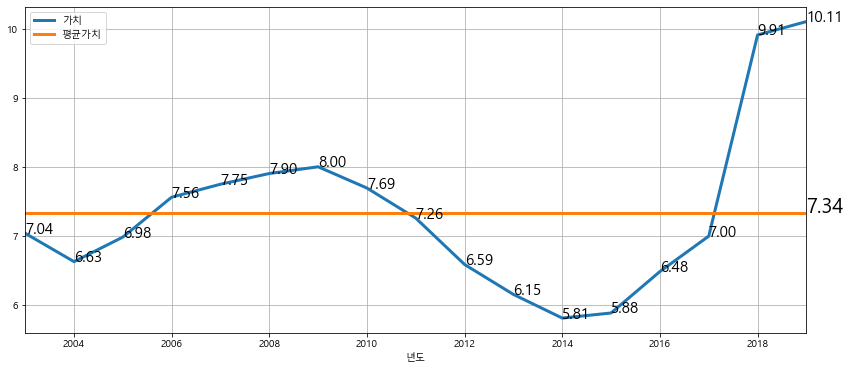

In [38]:
ax_value_info = plt.gca()
totalCount = value_info["가치"].count()
for index, value in value_info.iterrows():    
    
    x = int(value[0])
    y = value[5]
    comment = str("{0:.2f}".format(value[5]))

    ax_value_info.text(x, y, comment, fontsize=15)
    
    if totalCount == index:
        ax_value_info.text(x, value[6], '{:,.2f}'.format(value[6]), fontsize=20)


value_info.plot(kind='line', x=value_info.columns[0], y=value_info.columns[5], ax=ax_value_info)
value_info.plot(kind='line', x=value_info.columns[0], y=value_info.columns[6], ax=ax_value_info)

plt.show()

### 심리차트

In [39]:
import pandas as pd
import xlwings as xw

path = r'{}'
wb = xw.Book(path) 
print(path)
sheet = wb.sheets['{}']   
row_num = sheet.range(1,1).end('down').end('down').row  
data_range = 'B2:BV' + str(row_num)
#apt_info_column = ["단지명", "주소(지번)", "주소(도로명)", "공급/전용면적", "세대수", "방/욕실수", "현관구조"]
mentality = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 

데이터\11월차트실습(유나바머), 1120.xlsx


In [40]:
reorganizeColumns(mentality, '날짜 전국 서울 강북 강남 6개광역시 5개광역시 부산 대구 인천 광주 대전 울산 세종 수도권 경기도 강원도 충청북도 충청남도 전라북도 전라남도 경상북도 경상남도 기타지방 제주', 0)
mentality = mentality.drop([0,0])
mentality.fillna(0)

날짜         전국                               서울             \
             날짜      매도세우위      매수세우위     매수우위지수      매도세우위      매수세우위   
1      2003.7.1  44.030035  11.913566  67.883531  42.000000  11.500000   
2      2003.7.8  47.531783   7.983846  60.452063  40.600000   8.900000   
3     2003.7.15  48.117014   7.917014  59.800000  41.200000  11.300000   
4     2003.7.22  46.400000   7.700000  61.300000  45.600000   9.400000   
5     2003.7.29  45.300000   8.700000  63.400000  40.900000   9.900000   
..          ...        ...        ...        ...        ...        ...   
823  2019.10.14  61.326973   8.632698  47.305724  19.475281  26.542947   
824  2019.10.21  60.297039  10.007183  49.710144  17.330464  31.112916   
825  2019.10.28  58.035503  10.066251  52.030748  17.284245  31.742855   
826  2019.11.04  58.044445  10.286296  52.241851  16.285180  30.351176   
827  2019.11.11  54.533310  12.899612  58.366303  14.069623  33.218522   

                        강북                         ...       경상북도       경상남도  \
         매수우위지수      매도세우위      매수세우위      매수우위지수  ...     매수우위지수      매도세우위   
1     69.500000   0.000000   0.000000    0.000000  ...   0.000000   0.000000   
2     68.300000   0.000000   0.000000    0.000000  ...   0.000000   0.000000   
3     70.100000   0.000000   0.000000    0.000000  ...   0.000000   0.000000   
4     63.800000   0.000000   0.000000    0.000000  ...   0.000000   0.000000   
5     69.000000   0.000000   0.000000    0.000000  ...   0.000000   0.000000   
..          ...        ...        ...         ...  ...        ...        ...   
823  107.067666  15.269234  32.231652  116.962418  ...  24.234025  74.913513   
824  113.782453  15.031602  35.753320  120.721718  ...  22.835916  74.454952   
825  114.458610  14.082883  37.035637  122.952754  ...  25.919870  72.159206   
826  114.065997  15.838651  34.798539  118.959888  ...  28.300439  72.044642   
827  119.148899  10.834142  39.226609  128.392468  ...  41.798676  68.462939   

                               기타지방                          제주               
        매수세우위     매수우위지수      매도세우위      매수세우위     매수우위지수 매도세우위 매수세우위 매수우위지수  
1    0.000000   0.000000  44.400000  14.800000  70.400000   0.0   0.0    0.0  
2    0.000000   0.000000  49.400000   8.600000  59.200000   0.0   0.0    0.0  
3    0.000000   0.000000  46.900000  11.100000  64.200000   0.0   0.0    0.0  
4    0.000000   0.000000  43.900000   9.800000  65.900000   0.0   0.0    0.0  
5    0.000000   0.000000  43.900000  11.000000  67.100000   0.0   0.0    0.0  
..        ...        ...        ...        ...        ...   ...   ...    ...  
823  3.034930  28.121418  75.000000   0.000000  25.000000   0.0   0.0    0.0  
824  3.968242  29.513290  60.000000   0.000000  40.000000   0.0   0.0    0.0  
825  3.468101  31.308895  57.142857   0.000000  42.857143   0.0   0.0    0.0  
826  3.109218  31.064576  64.705882   5.882353  41.176471   0.0   0.0    0.0  
827  4.914914  36.451976  44.444444   0.000000  55.555556   0.0   0.0    0.0  

[827 rows x 73 columns]

In [41]:
from matplotlib import font_manager, rc
import matplotlib.pylab as plt
from matplotlib import pyplot
import numpy as np
import string

%matplotlib inline

plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

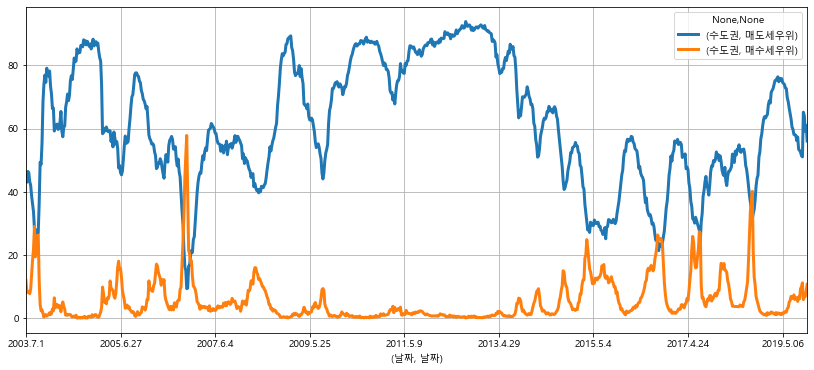

In [42]:
ax_mentality = plt.gca()
# totalCount = mentality["가치"].count()
# for index, value in value_info.iterrows():    
    
#     x = int(value[0])
#     y = value[5]
#     comment = str("{0:.2f}".format(value[5]))

#     ax_value_info.text(x, y, comment, fontsize=15)
    
#     if totalCount == index:
#         ax_value_info.text(x, value[6], '{:,.2f}'.format(value[6]), fontsize=20)

x = mentality.columns[0]
y = [40, 41]
mentality.plot(kind='line', x=x, y=y, ax=ax_mentality)
#value_info.plot(kind='line', x=value_info.columns[0], y=value_info.columns[6], ax=ax_value_info)

plt.show()

In [43]:
from datetime import datetime
new_mentality = mentality
ret = pd.to_datetime(mentality['날짜']['날짜'], errors='coerce')
mentality['날짜'] = ret
new_mentality = mentality[mentality["날짜"]["날짜"].dt.year >= 2018]

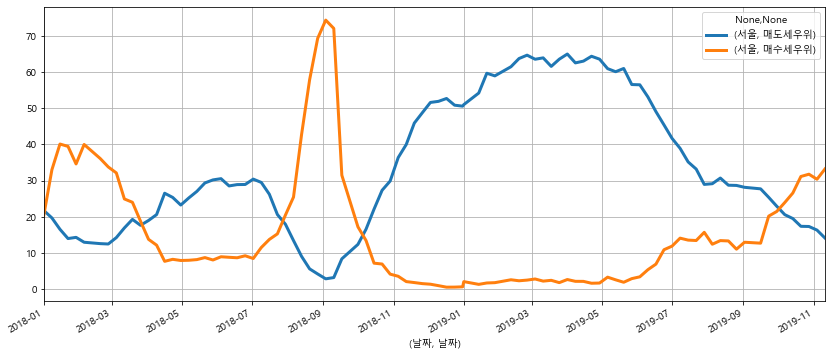

In [44]:
ax_mentality = plt.gca()
# totalCount = mentality["가치"].count()
# for index, value in value_info.iterrows():    
    
#     x = int(value[0])
#     y = value[5]
#     comment = str("{0:.2f}".format(value[5]))

#     ax_value_info.text(x, y, comment, fontsize=15)
    
#     if totalCount == index:
#         ax_value_info.text(x, value[6], '{:,.2f}'.format(value[6]), fontsize=20)

x = new_mentality.columns[0]
y = [4, 5]
new_mentality.plot(kind='line', x=x, y=y, ax=ax_mentality)
#value_info.plot(kind='line', x=value_info.columns[0], y=value_info.columns[6], ax=ax_value_info)

plt.show()